In [1]:
import time

import torch
from dataTreat.readData import LzgdDataset,img_transforms
import numpy as np
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
import os,cv2
import numpy as np
import tool.visualizationTool as visTool


train_img_dir='../data/trainImgPart'
train_label_dir='../data/trainLabel1Part'

trainDataset = LzgdDataset(train_img_dir,train_label_dir,img_transforms)
trainDataloader = DataLoader(trainDataset, batch_size=1, shuffle=True, num_workers=0, pin_memory=True)
type(trainDataset),len(trainDataset)

valid_img_dir='../data/validImg'
valid_label_dir='../data/validLabel1'

validDataset = LzgdDataset(valid_img_dir,valid_label_dir,img_transforms)
validDataloader = DataLoader(validDataset, batch_size=1, shuffle=True, num_workers=0, pin_memory=True)
print('读取数据完成')
#


读取数据完成


In [3]:
import torch
from torch import nn,optim
import pandas as pd
import numpy as np
from collections import Counter
import tool.tool as tool
from module.module import Module
from module.lzgdModule import Lzgd
from module.FCNModule import FCN
from module.unet import UNet
from indicator import evaluate as eva
from module.unetplusplusModule import NestedUNet
from loss.dice import BCE_DICE_Loss
import cv2


torch.cuda.is_available()
torch.manual_seed(42)
img,label=trainDataloader.dataset[0]
# visTool.showImage(label)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#超参数
lr=1e-2
criterion = nn.BCEWithLogitsLoss().cuda()
model_unet=Module(model=UNet(n_channels=3,n_classes=3).cuda(),criterion=criterion,LR=lr,flag='unet')
optimizer = torch.optim.Adam(params=model_unet.model.parameters(),lr=lr)
model=model_unet.model




epochs = 200
tj=None
pred_list=[]
np_list=[]

for epoch in range(epochs):
    img=tool.Dim3to4(img)
    label=tool.Dim3to4(label)
    model.train()
    img=img.to(device=device)
    pred=model(img)
    # pred=pred.sigmoid()
    pred_list.append(pred)
    loss = criterion(pred, label.to(device=device))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # _, labeled = torch.max(label, dim=1)
    # print(tool.getValueCount(_),tool.getValueCount(labeled))
    # print(_.shape,labeled.shape,label.shape)

    # _, preded = torch.max(pred, dim=1)
    # print(tool.getValueCount(_),tool.getValueCount(preded))
    # print(_.shape,preded.shape,pred.shape)
    print(epoch,loss.data)

    aa=tool.tensor2numpy(pred)*255
    np_list.append(aa)
    cv2.imwrite(f'../data/data_pred1/{str(epoch)}.png',aa)

0 tensor(0.7492, device='cuda:0')
1 tensor(0.6980, device='cuda:0')
2 tensor(0.5415, device='cuda:0')
3 tensor(0.4390, device='cuda:0')
4 tensor(0.3398, device='cuda:0')
5 tensor(0.2568, device='cuda:0')
6 tensor(0.1948, device='cuda:0')
7 tensor(0.1495, device='cuda:0')
8 tensor(0.1146, device='cuda:0')
9 tensor(0.0888, device='cuda:0')
10 tensor(0.0702, device='cuda:0')
11 tensor(0.0557, device='cuda:0')
12 tensor(0.0452, device='cuda:0')
13 tensor(0.0375, device='cuda:0')
14 tensor(0.0317, device='cuda:0')
15 tensor(0.0274, device='cuda:0')
16 tensor(0.0238, device='cuda:0')
17 tensor(0.0212, device='cuda:0')
18 tensor(0.0191, device='cuda:0')
19 tensor(0.0174, device='cuda:0')
20 tensor(0.0162, device='cuda:0')
21 tensor(0.0153, device='cuda:0')
22 tensor(0.0144, device='cuda:0')
23 tensor(0.0138, device='cuda:0')
24 tensor(0.0133, device='cuda:0')
25 tensor(0.0129, device='cuda:0')
26 tensor(0.0125, device='cuda:0')
27 tensor(0.0123, device='cuda:0')
28 tensor(0.0120, device='cuda

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


{0.003798169: 1,
 0.00390657: 1,
 0.003940334: 1,
 0.0039524753: 1,
 0.0041049: 1,
 0.004194488: 1,
 0.0042037303: 1,
 0.0042563532: 1,
 0.004262593: 1,
 0.0044935904: 1,
 0.004527832: 1,
 0.004599322: 1,
 0.004758078: 1,
 0.004794079: 1,
 0.0048394073: 1,
 0.004900534: 1,
 0.0051070857: 1,
 0.005113631: 1,
 0.0053709396: 1,
 0.0054243905: 1,
 0.0054395534: 1,
 0.0054682586: 1,
 0.0054917964: 1,
 0.0055034882: 1,
 0.0055565415: 1,
 0.005567697: 1,
 0.005747603: 1,
 0.005763586: 1,
 0.0057911673: 1,
 0.005809864: 1,
 0.0058287997: 1,
 0.005852466: 1,
 0.005909442: 1,
 0.0059454488: 1,
 0.0059673125: 1,
 0.0061362158: 1,
 0.0061435346: 1,
 0.006178617: 1,
 0.0062126555: 1,
 0.0062287324: 1,
 0.0062333797: 1,
 0.0062499866: 1,
 0.006328574: 1,
 0.0063573252: 1,
 0.0063611157: 1,
 0.0064024082: 1,
 0.006430078: 1,
 0.0064364215: 1,
 0.006468412: 1,
 0.0064700656: 1,
 0.006481201: 1,
 0.0064865923: 1,
 0.006497476: 1,
 0.006510483: 1,
 0.00653339: 1,
 0.0065691704: 1,
 0.006638052: 1,
 0.00

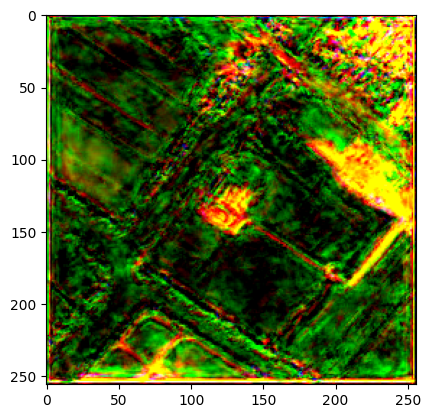

In [6]:
path='../data/data_pred'
os.path.exists(path)

visTool.showImage(pred_list[0])
#
tool.getValueCount(np_list[190])
# ouputImg=tool.tensor2numpy(pred_list[190])*255
# ouputImg.shape
# tool.getValueCount(ouputImg)
# cv2.imwrite(r'190.png',ouputImg)

In [7]:
file='../data/data_pred/190.png'
img=cv2.imread(file)
tool.getValueCount(img)

{1: 11,
 2: 245,
 3: 4979,
 4: 60140,
 5: 29671,
 6: 67791,
 7: 30532,
 8: 999,
 9: 56,
 10: 16,
 11: 14,
 12: 8,
 13: 13,
 14: 9,
 15: 8,
 16: 10,
 17: 3,
 18: 6,
 19: 6,
 20: 13,
 21: 6,
 22: 6,
 23: 8,
 24: 2,
 25: 2,
 26: 2,
 27: 2,
 28: 3,
 29: 4,
 30: 1,
 31: 1,
 32: 8,
 34: 1,
 35: 2,
 36: 3,
 37: 1,
 38: 4,
 39: 2,
 40: 4,
 41: 4,
 42: 1,
 45: 1,
 47: 1,
 48: 2,
 49: 1,
 50: 2,
 51: 1,
 55: 2,
 56: 2,
 57: 2,
 58: 1,
 59: 2,
 60: 3,
 61: 1,
 63: 2,
 65: 3,
 66: 1,
 68: 3,
 70: 2,
 73: 2,
 74: 1,
 76: 2,
 77: 1,
 78: 2,
 80: 3,
 81: 1,
 82: 2,
 83: 2,
 84: 2,
 85: 2,
 86: 1,
 87: 2,
 88: 1,
 90: 1,
 92: 1,
 93: 4,
 94: 4,
 95: 1,
 96: 1,
 97: 3,
 98: 1,
 101: 1,
 103: 2,
 104: 3,
 105: 1,
 107: 1,
 108: 1,
 111: 1,
 113: 1,
 115: 2,
 116: 1,
 118: 1,
 119: 1,
 120: 1,
 121: 1,
 122: 3,
 123: 1,
 124: 1,
 126: 1,
 127: 2,
 128: 4,
 131: 2,
 134: 1,
 136: 1,
 137: 2,
 145: 5,
 146: 1,
 148: 1,
 149: 1,
 151: 2,
 152: 3,
 153: 1,
 154: 3,
 155: 1,
 156: 1,
 157: 1,
 161: 1,
 165: 2